Task 1 

In [ ]:
import sympy as sp

z, beta, epsilon, M, j = sp.symbols('z beta epsilon M j')

Xi = sp.Product(1 + z * sp.exp(-beta * j * epsilon), (j, 1, M))

print("The grand canonical partition function is:")
sp.pretty_print(Xi)


The grand canonical partition function is:
  M                 
─┬──┬─              
 │  │     -β⋅ε⋅j    
 │  │  z⋅ℯ       + 1
 │  │               
j = 1               


Task 2

In [ ]:
# a)

# N0 + N1 = N

# E =(epsilon) * N1


# b)

# Z = [1 + e^(-B * epsilon)]^N


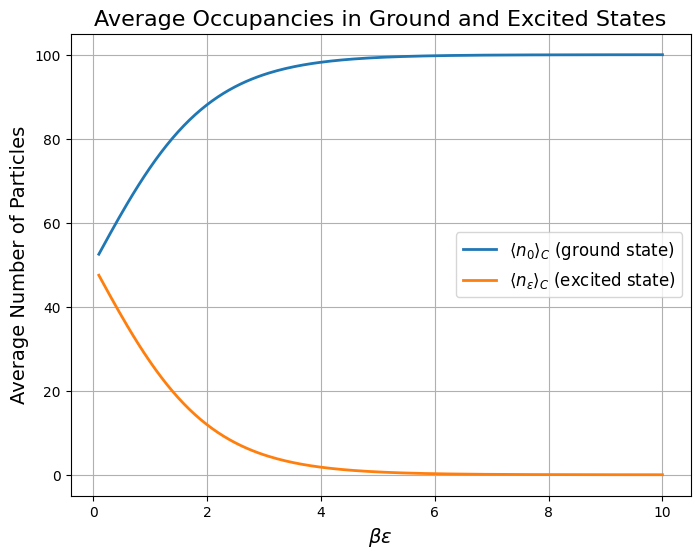

In [4]:
# c)

import numpy as np
import matplotlib.pyplot as plt

N = 100          
epsilon = 1.0     

beta_epsilon = np.linspace(0.1, 10, 200)

p_excited = np.exp(-beta_epsilon) / (1 + np.exp(-beta_epsilon))
p_ground = 1 / (1 + np.exp(-beta_epsilon))

n_excited = N * p_excited
n_ground = N * p_ground

plt.figure(figsize=(8, 6))
plt.plot(beta_epsilon, n_ground, label=r'$\langle n_0 \rangle_C$ (ground state)', lw=2)
plt.plot(beta_epsilon, n_excited, label=r'$\langle n_\epsilon \rangle_C$ (excited state)', lw=2)
plt.xlabel(r'$\beta \epsilon$', fontsize=14)
plt.ylabel('Average Number of Particles', fontsize=14)
plt.title('Average Occupancies in Ground and Excited States', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()



In [ ]:
# d)

# Z = [1 - e^-(B * epsilon (N + 1))] / [1 - e^-(B * epsilon)]

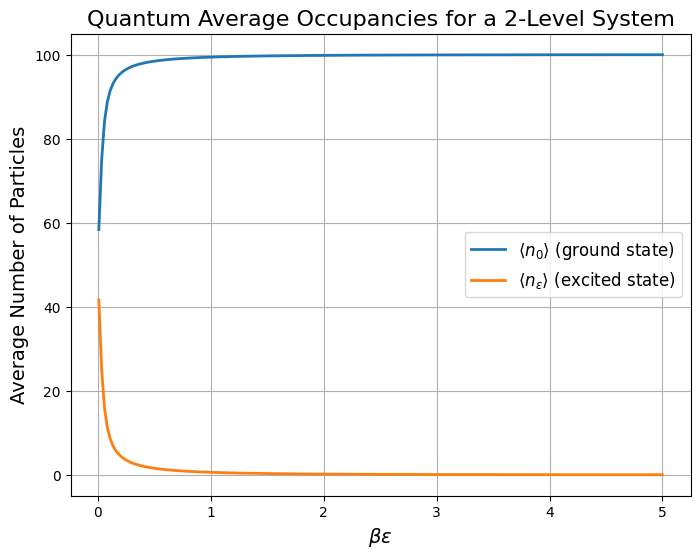

In [ ]:
# e)

def avg_excited(beta, epsilon, N):
    r = np.exp(-beta * epsilon)
    numerator = r * (1 - (N+1) * r**N + N * r**(N+1))
    denominator = (1 - r) * (1 - r**(N+1))
    return numerator / denominator

def avg_ground(beta, epsilon, N):
    return N - avg_excited(beta, epsilon, N)


N = 100           
epsilon = 1.0     

beta_vals = np.linspace(0.01, 5, 200)  

n_excited = np.array([avg_excited(beta, epsilon, N) for beta in beta_vals])
n_ground = np.array([avg_ground(beta, epsilon, N) for beta in beta_vals])

plt.figure(figsize=(8, 6))
plt.plot(beta_vals * epsilon, n_ground, label=r'$\langle n_0 \rangle$ (ground state)', lw=2)
plt.plot(beta_vals * epsilon, n_excited, label=r'$\langle n_\epsilon \rangle$ (excited state)', lw=2)
plt.xlabel(r'$\beta \epsilon$', fontsize=14)
plt.ylabel('Average Number of Particles', fontsize=14)
plt.title('Quantum Average Occupancies for a 2-Level System', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


In [ ]:
# f)

# To ensure a normalizable system, chemical potential must be less than zero 
# for the ground state, and it must be less than the energy for the excited 
# state.

# g)

# Average ground state particle number number:
# <n> = e^(Bu) / (1 - e^(Bu)

/tmp/ipykernel_63415/1225970187.py:14: RuntimeWarning: overflow encountered in exp
  occ = 1.0 / (np.exp(beta*(levels - mu)) - 1)
/tmp/ipykernel_63415/1225970187.py:19: RuntimeWarning: overflow encountered in exp
  occ = 1.0 / (np.exp(beta*(levels - mu)) - 1)


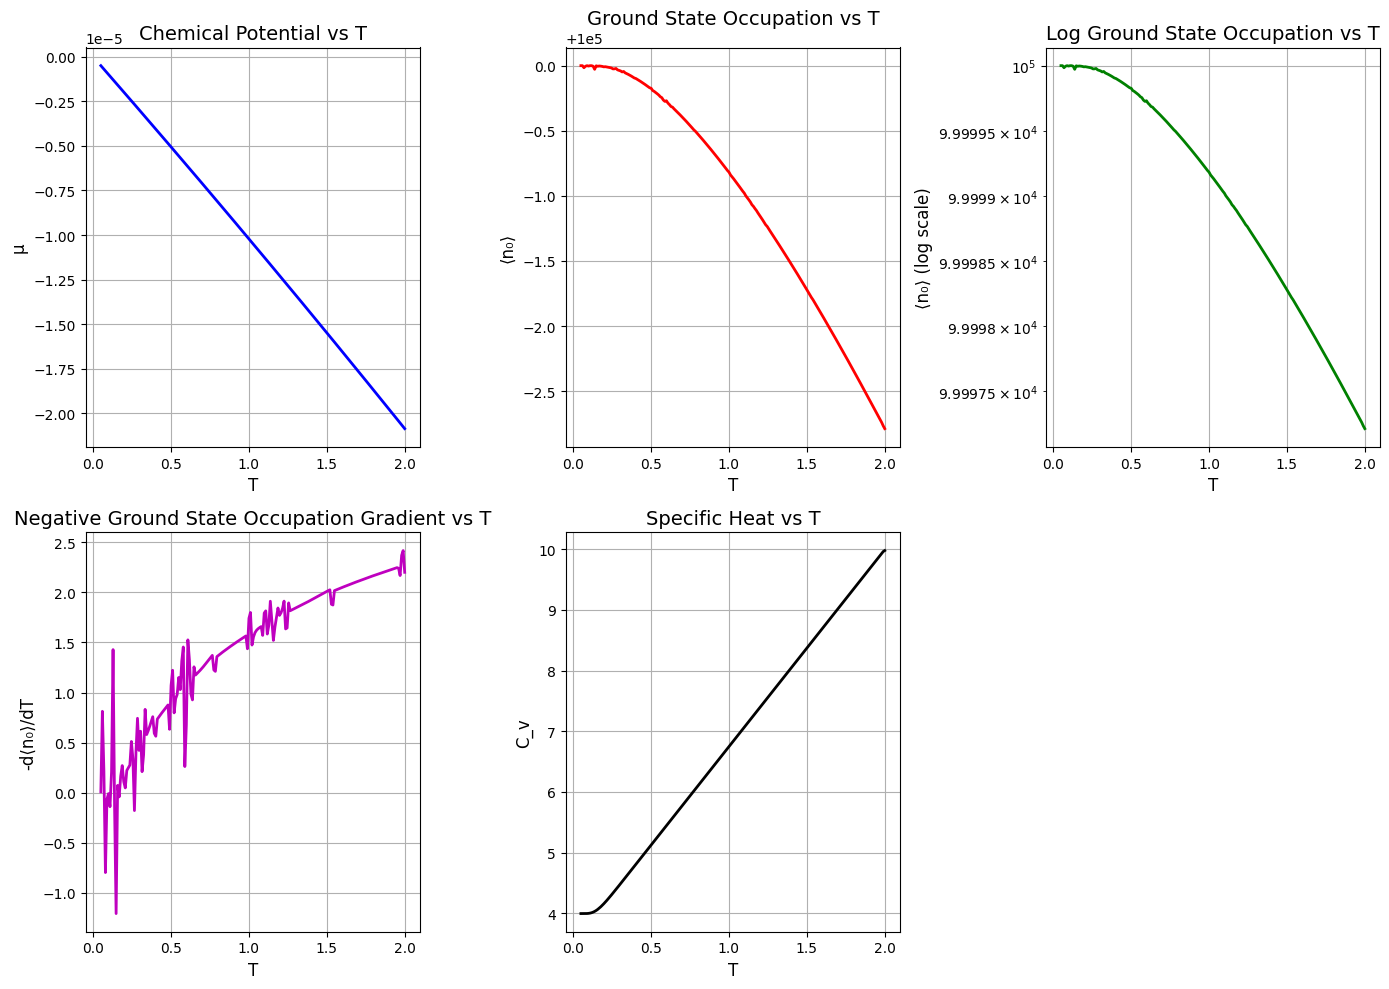

In [6]:
# i)

from scipy.optimize import brentq

N = 100000
kB = 1.0
delta = 1e-3
ground_levels = np.array([0, delta, 2*delta, 3*delta, 4*delta])
excited_levels = np.arange(1, 101, dtype=float)
levels = np.concatenate((ground_levels, excited_levels))

def total_number(mu, T, levels):
    beta = 1.0 / T
    occ = 1.0 / (np.exp(beta*(levels - mu)) - 1)
    return np.sum(occ)

def total_energy(mu, T, levels):
    beta = 1.0 / T
    occ = 1.0 / (np.exp(beta*(levels - mu)) - 1)
    return np.sum(levels * occ)

T_vals = np.linspace(0.05, 2.0, 200)
mu_vals = np.zeros_like(T_vals)
n0_vals = np.zeros_like(T_vals)
E_vals  = np.zeros_like(T_vals)
Cv_vals = np.zeros_like(T_vals)

for i, T in enumerate(T_vals):
    beta = 1.0 / T
    f = lambda mu: total_number(mu, T, levels) - N
    try:
        mu_sol = brentq(f, -100, -1e-10)
    except Exception as e:
        mu_sol = np.nan
    mu_vals[i] = mu_sol
    occ_ground = 1.0 / (np.exp(beta*(ground_levels - mu_sol)) - 1)
    n0_vals[i] = np.sum(occ_ground)
    E_vals[i] = total_energy(mu_sol, T, levels)

dn0_dT = np.gradient(n0_vals, T_vals)
neg_dn0_dT = -dn0_dT
dE_dT = np.gradient(E_vals, T_vals)
Cv_vals = dE_dT

plt.figure(figsize=(14, 10))
plt.subplot(2, 3, 1)
plt.plot(T_vals, mu_vals, 'b-', lw=2)
plt.xlabel('T', fontsize=12)
plt.ylabel('μ', fontsize=12)
plt.title('Chemical Potential vs T', fontsize=14)
plt.grid(True)
plt.subplot(2, 3, 2)
plt.plot(T_vals, n0_vals, 'r-', lw=2)
plt.xlabel('T', fontsize=12)
plt.ylabel('⟨n₀⟩', fontsize=12)
plt.title('Ground State Occupation vs T', fontsize=14)
plt.grid(True)
plt.subplot(2, 3, 3)
plt.semilogy(T_vals, n0_vals, 'g-', lw=2)
plt.xlabel('T', fontsize=12)
plt.ylabel('⟨n₀⟩ (log scale)', fontsize=12)
plt.title('Log Ground State Occupation vs T', fontsize=14)
plt.grid(True)
plt.subplot(2, 3, 4)
plt.plot(T_vals, neg_dn0_dT, 'm-', lw=2)
plt.xlabel('T', fontsize=12)
plt.ylabel('-d⟨n₀⟩/dT', fontsize=12)
plt.title('Negative Ground State Occupation Gradient vs T', fontsize=14)
plt.grid(True)
plt.subplot(2, 3, 5)
plt.plot(T_vals, Cv_vals, 'k-', lw=2)
plt.xlabel('T', fontsize=12)
plt.ylabel('C_v', fontsize=12)
plt.title('Specific Heat vs T', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()
